<a href="https://colab.research.google.com/github/Shibli-Nomani/Telco-Project-With-ML/blob/main/project_03_p2_telco_risk_management.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Risk Management**

Analysis the Risk factors of BTS at different location in USA depending on some parameters to get the outcome which may also help to choose location/city to deploy new BTS.

Dataset we are using with some menupolation. It is not relevant to real world. We use it as a demonstration for risk management purpose.

In [85]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [87]:
path='/content/gdrive/MyDrive/DataScience-Telco-Project/telecom_risk_management.csv'
df = pd.read_csv(path)
df.head(5)

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,BTS_deploy_UnderRisk
0,Newyork,8.032,14,8,3,6,0,1
1,Chicago,77.730,8,3,3,8,1,0
2,Philadelphia,59.203,3,12,11,3,0,1
3,Fayetteville,73.080,4,5,7,6,0,0
4,Atlanta,15.666,13,15,6,7,2,1


In [ ]:
df.shape

(543, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  543 non-null    object 
 1   Location_Score        543 non-null    float64
 2   Internal_Audit_Score  543 non-null    int64  
 3   External_Audit_Score  543 non-null    int64  
 4   Fin_Score             543 non-null    int64  
 5   Loss_score            543 non-null    int64  
 6   Past_Results          543 non-null    int64  
 7   BTS_deploy_UnderRisk  543 non-null    int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 34.1+ KB


In [ ]:
df.columns

Index(['City', 'Location_Score', 'Internal_Audit_Score',
       'External_Audit_Score', 'Fin_Score', 'Loss_score', 'Past_Results',
       'BTS_deploy_UnderRisk'],
      dtype='object')

**To remove whitespace for specific column**

In [ ]:
df['City'] = df['City'].str.strip()

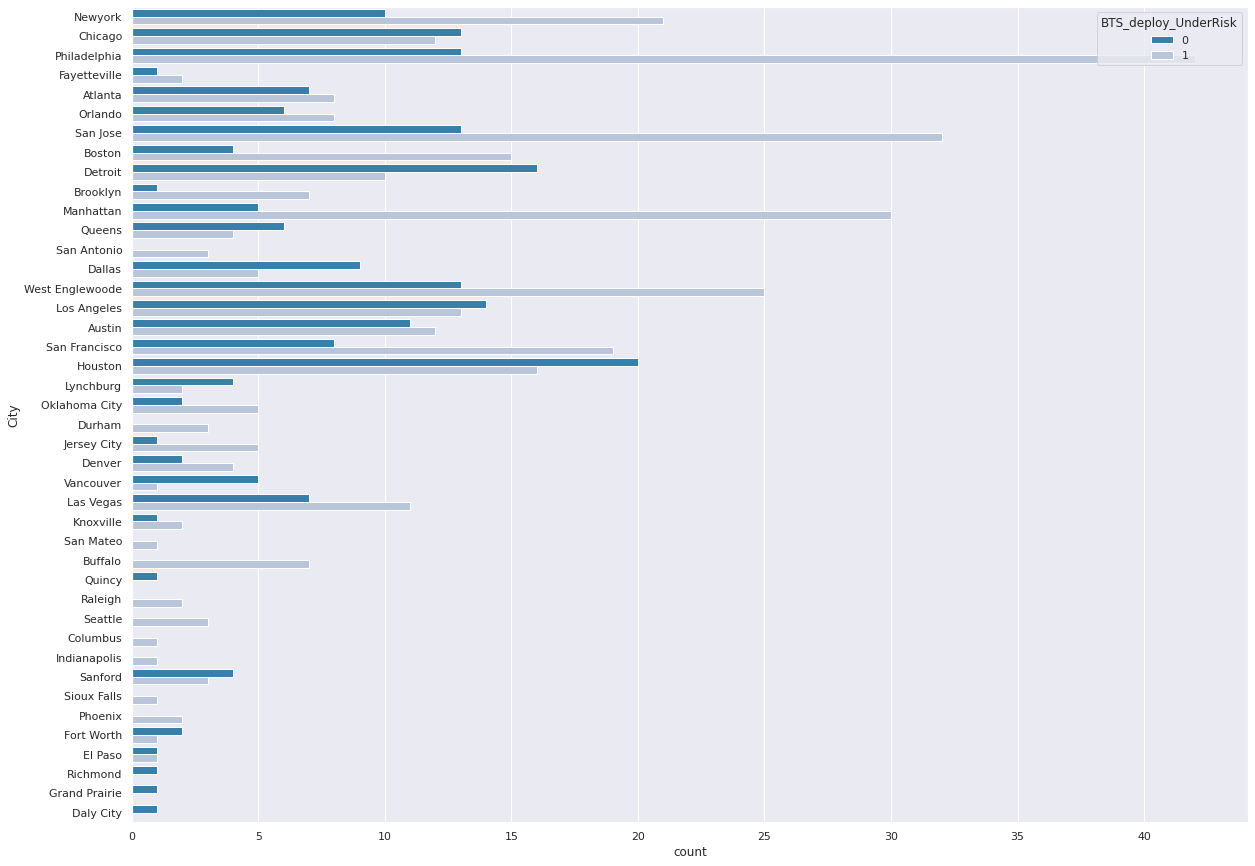

In [ ]:
#risk factor is denoted as 1 and no risk is denoted as 0
sns.countplot(y='City', hue='BTS_deploy_UnderRisk', data=df, palette='PuBu_r')
sns.set(rc={'figure.figsize':(20,20)})
sns.set(font_scale=1)

In [ ]:
df['BTS_deploy_UnderRisk'].value_counts()

1    340
0    203
Name: BTS_deploy_UnderRisk, dtype: int64

In [ ]:
df.columns

Index(['City', 'Location_Score', 'Internal_Audit_Score',
       'External_Audit_Score', 'Fin_Score', 'Loss_score', 'Past_Results',
       'BTS_deploy_UnderRisk'],
      dtype='object')

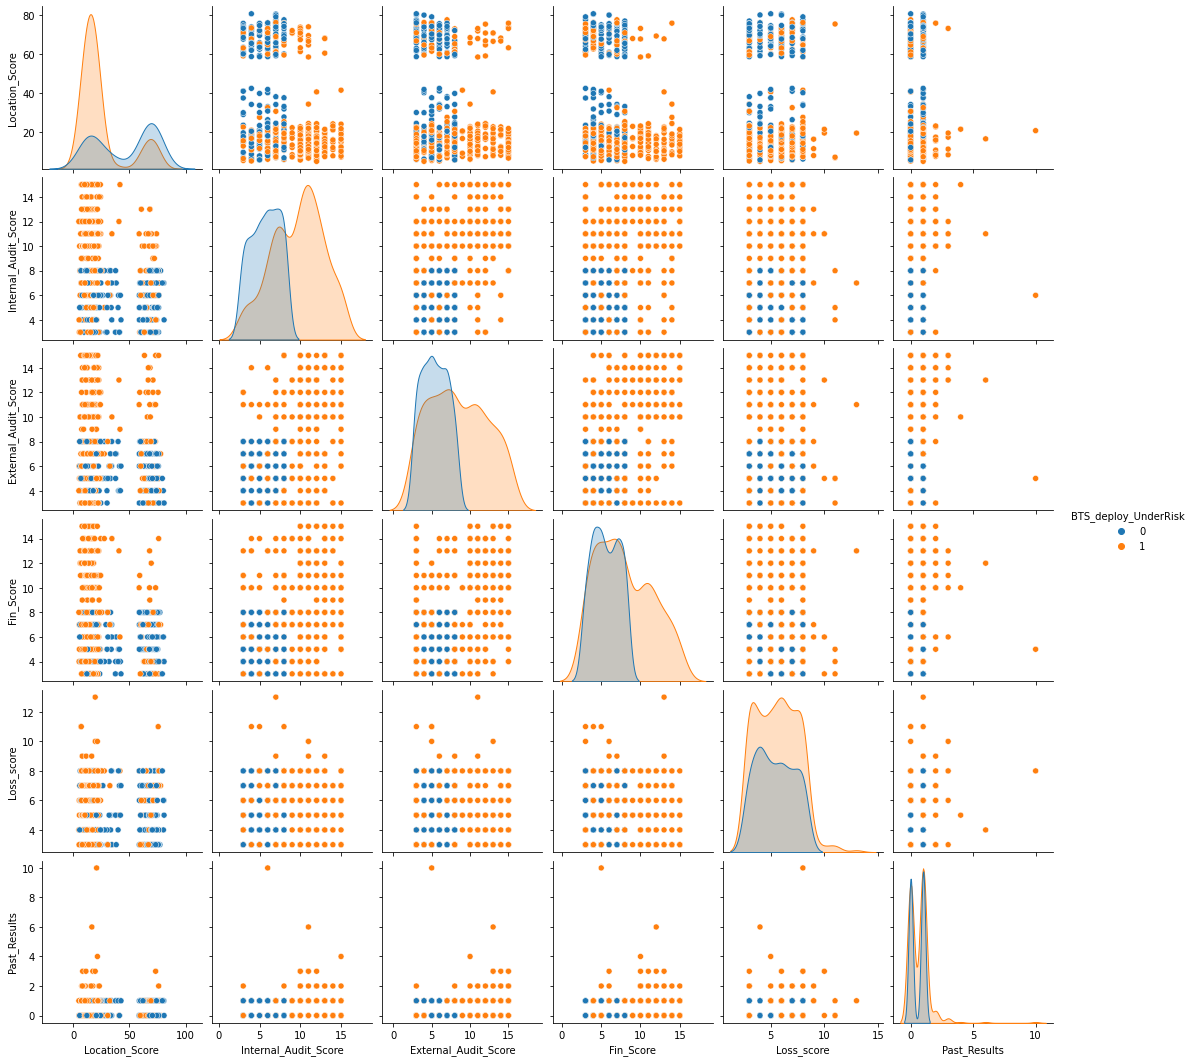

In [ ]:
sns.pairplot(df, hue="BTS_deploy_UnderRisk")

**Correlation Status**

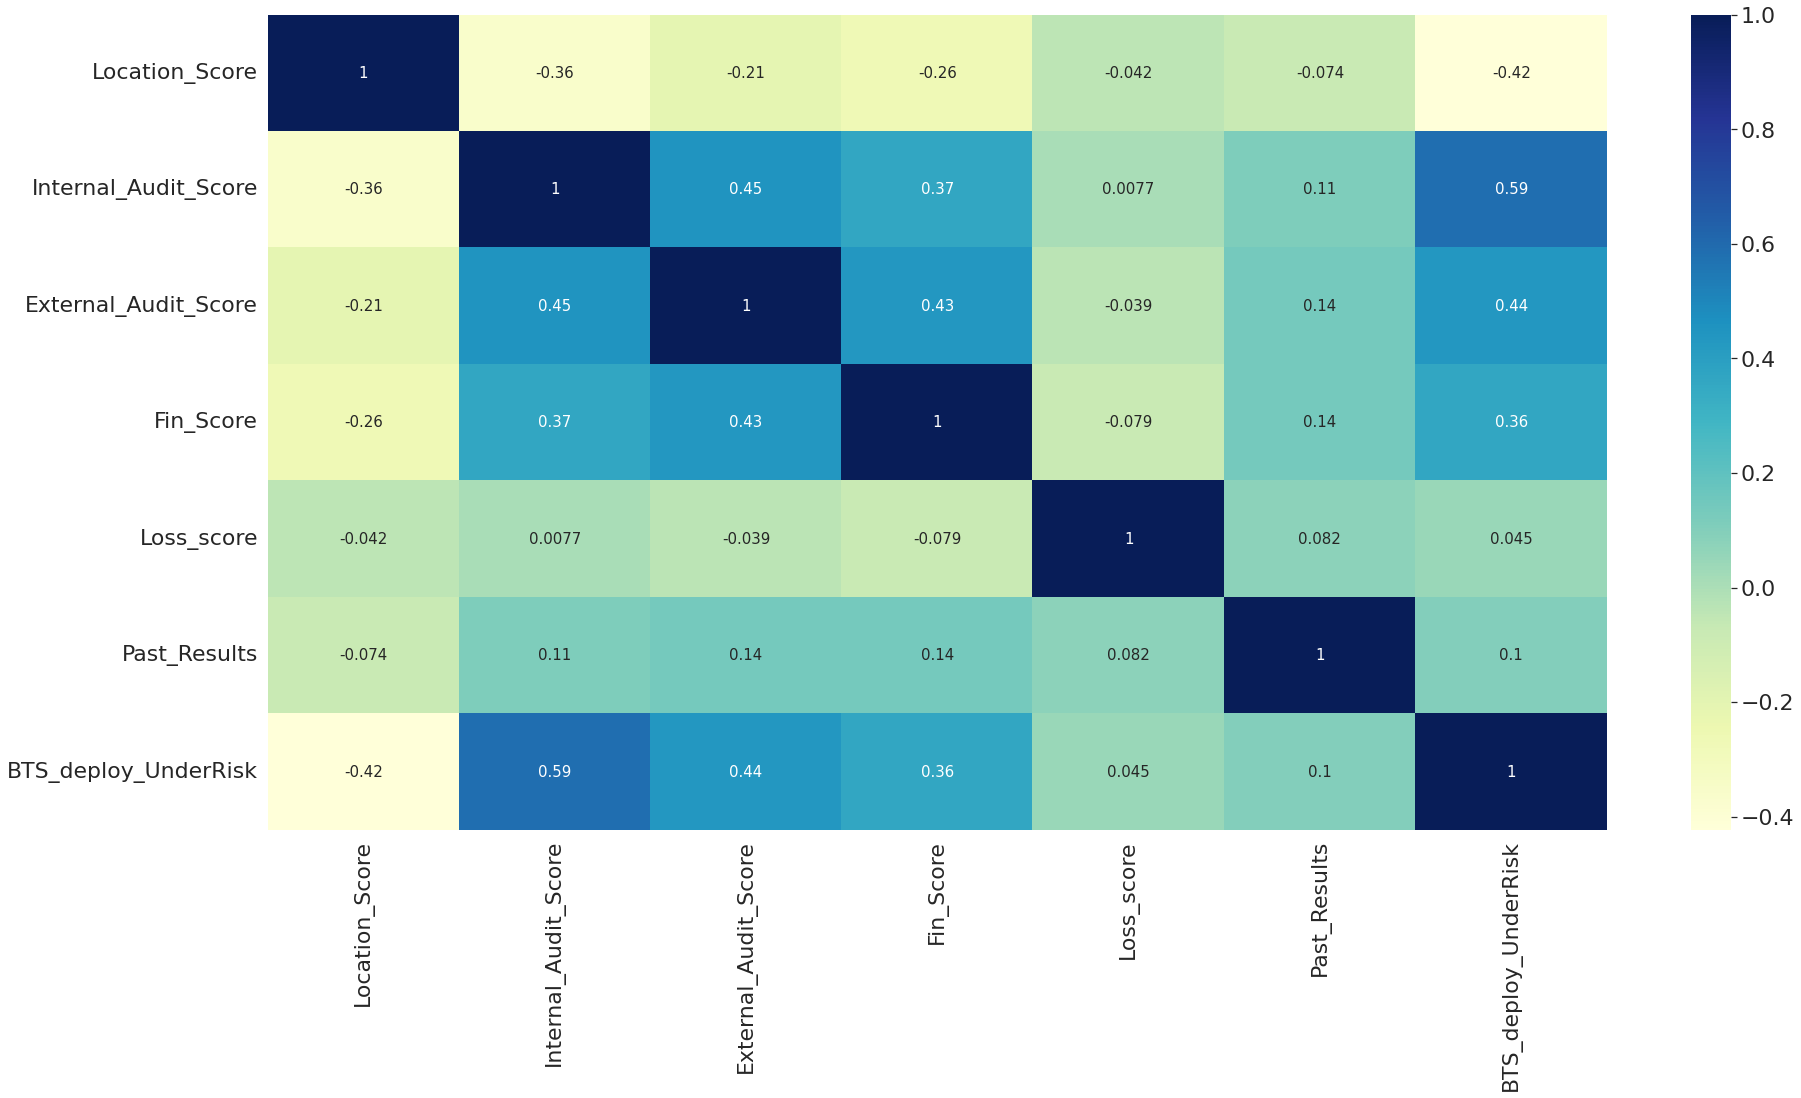

In [ ]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True, annot_kws={"size":15})
sns.set(rc={'figure.figsize':(20,15)})
sns.set(font_scale = 2)

**Prepare Different ML Model**

In [88]:
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, f1_score, auc,roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_absolute_error


from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [89]:
df.columns

Index(['City', 'Location_Score', 'Internal_Audit_Score',
       'External_Audit_Score', 'Fin_Score', 'Loss_score', 'Past_Results',
       'BTS_deploy_UnderRisk'],
      dtype='object')

**Target and Features**

In [90]:
#Target
y=df['BTS_deploy_UnderRisk']
#Features

X=df.copy()
X=df.drop('BTS_deploy_UnderRisk', axis=1)

In [33]:
X.head(5)

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results
0,Newyork,8.032,14,8,3,6,0
1,Chicago,77.730,8,3,3,8,1
2,Philadelphia,59.203,3,12,11,3,0
3,Fayetteville,73.080,4,5,7,6,0
4,Atlanta,15.666,13,15,6,7,2


**Feature Scaling**

In [91]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
le=LabelEncoder()
sc=StandardScaler()
import numpy as np
from pandas.core.dtypes.common import is_numeric_dtype
for column in X.columns:
  if is_numeric_dtype(X[column]):
    X[column]=sc.fit_transform(X[[column]])
    
  else:
    X[column]=le.fit_transform(X[[column]])
X.head()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results
0,28,-0.974380,1.755928,0.194980,-1.282800,0.255582,-0.802902
1,17,1.828748,-0.057325,-1.255351,-1.282800,1.344059,0.506334
2,30,1.083625,-1.568369,1.355245,1.253606,-1.377134,-0.802902
3,22,1.641733,-1.266160,-0.675219,-0.014597,0.255582,-0.802902
4,12,-0.667355,1.453719,2.225444,-0.331648,0.799820,1.815570


In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=42)
print(X.shape)
print(y.shape)

(543, 7)
(543,)


In [93]:
models = [
   LogisticRegression(),
   LinearSVC(random_state=42),
   SGDClassifier(),
   KNeighborsClassifier(),
   RandomForestClassifier(random_state=42),
   DecisionTreeClassifier(random_state=42),
   GradientBoostingClassifier(random_state=42),
   XGBClassifier(random_state=42),
   AdaBoostClassifier(random_state=42),
   LinearDiscriminantAnalysis()
   ]

In [94]:
names =['LogisticRegression', 'SVMLinear', 'SGD', 'KNN', 'RandomForest', 'DecisionTree', 'GradientBoost', 'XGBOOST', 'ADABoost', 'LDA']  

models_columns = []
models_compare = pd.DataFrame(columns = models_columns)

row_index = 0
for models_name, ml in zip(names, models): 
    
    ml.fit(X_train, y_train)
    y_pred=ml.fit(X_train, y_train).predict(X_test)
    fp, tp, tn = roc_curve(y_test, y_pred)
    #models_name = ml.__class__.__name__
    models_compare.loc[row_index,'Model Name'] = models_name
    models_compare.loc[row_index, 'Train Accuracy'] = round(ml.score(X_train, y_train), 5)
    models_compare.loc[row_index, 'Test Accuracy'] = round(ml.score(X_test, y_test), 5)
    models_compare.loc[row_index, 'Precission'] = precision_score(y_test, y_pred)
    models_compare.loc[row_index, 'Recall'] = recall_score(y_test, y_pred)
    models_compare.loc[row_index, 'f1 Score']=f1_score(y_test, y_pred)
    models_compare.loc[row_index, 'AUC'] = auc(fp, tp)
    models_compare.loc[row_index, 'mean abs error']=mean_absolute_error(y_test, y_pred)
    row_index+=1
    
models_compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)

In [95]:
models_compare.style.set_properties(**{'background-color': 'blue',
                           'color': 'white'})

,Model Name,Train Accuracy,Test Accuracy,Precission,Recall,f1 Score,AUC,mean abs error
6,GradientBoost,0.960530,0.920250,0.961165,0.916667,0.938389,0.921970,0.079755
7,XGBOOST,0.939470,0.895710,0.941748,0.898148,0.919431,0.894529,0.104294
8,ADABoost,0.902630,0.889570,0.909091,0.925926,0.917431,0.872054,0.110429
4,RandomForest,1.000000,0.877300,0.915094,0.898148,0.906542,0.867256,0.122699
0,LogisticRegression,0.823680,0.852760,0.881818,0.898148,0.889908,0.830892,0.147239
1,SVMLinear,0.818420,0.852760,0.868421,0.916667,0.891892,0.821970,0.147239
9,LDA,0.828950,0.828220,0.870370,0.870370,0.870370,0.807912,0.171779
5,DecisionTree,1.000000,0.815950,0.842105,0.888889,0.864865,0.780808,0.184049
3,KNN,0.855260,0.779140,0.846154,0.814815,0.830189,0.761953,0.220859
2,SGD,0.686840,0.736200,0.715232,1.000000,0.833977,0.609091,0.263804


**Gradient Boost shows good result based on X_test**

In [96]:
gbc=GradientBoostingClassifier(random_state=42)
y_pred=gbc.fit(X_train, y_train).predict(X_test)
y_pred

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1])

In [97]:
print('Gradient Descent Classifer')
print('Train Accuracy' , round(gbc.score(X_train, y_train), 5))
print('Test Accuracy' , round(gbc.score(X_test, y_test), 5))
print('Precission' , precision_score(y_test, y_pred))
print('Recall' , recall_score(y_test, y_pred))
print('f1 Score',f1_score(y_test, y_pred))
print('AUC' , auc(fp, tp))
print('mean abs error',mean_absolute_error(y_test, y_pred))

Gradient Descent Classifer
Train Accuracy 0.96053
Test Accuracy 0.92025
Precission 0.9611650485436893
Recall 0.9166666666666666
f1 Score 0.9383886255924171
AUC 0.8079124579124579
mean abs error 0.07975460122699386


**Confusion Matrix**

In [98]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[51  4]
 [ 9 99]]


0.9202453987730062

**ROC and AUC Graph**

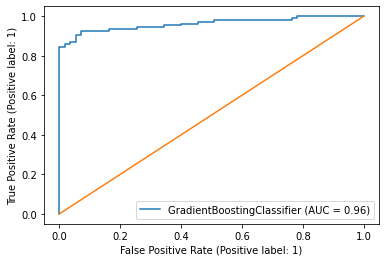

In [99]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(gbc,X_test, y_test)
plt.plot([0,1],[0,1])

In [119]:
y_pred=pd.DataFrame(y_pred)
y_pred.columns=['predicted']
y_pred

,predicted
0,1
1,0
2,0
3,1
4,1
...,...
158,1
159,1
160,0
161,0


In [117]:
y_test=pd.DataFrame(y_test)
y_test.columns=['Exact_of_BTS_deploy_UnderRisk']
y_test

,Exact_of_BTS_deploy_UnderRisk
530,1
478,1
354,0
531,1
322,1
...,...
154,1
126,1
277,0
364,0


In [118]:
X_inverse=le.inverse_transform(X_test['City'])
X_inverse=pd.DataFrame(X_inverse)
X_inverse.columns=['City']
X_inverse

,City
0,San Jose
1,Manhattan
2,Los Angeles
3,San Jose
4,Los Angeles
...,...
158,Manhattan
159,Manhattan
160,San Jose
161,Dallas


In [116]:
y_test.head(5)

530    1
478    1
354    0
531    1
322    1
Name: BTS_deploy_UnderRisk, dtype: int64

**Comparing y_pred and y_test**

In [127]:
dfs=y_test.merge(X_inverse, left_index=True, right_index=True)
y_pred.merge(dfs, left_index=True, right_index=True)

,predicted,Exact_of_BTS_deploy_UnderRisk,City
0,1,1,San Jose
2,0,1,Los Angeles
6,1,0,Austin
9,0,0,Las Vegas
10,1,1,San Jose
11,1,1,Brooklyn
15,1,1,San Francisco
18,1,0,Dallas
19,0,1,Oklahoma City
22,1,1,Atlanta
